# Summing up sine-waves with different amplitudes

By multiplying a **column** vector for the frequencies with a **row** vector for the time-steps we can in one step create a data-matrix

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## Generate column- and row-vectors

In [29]:
# Set the parameters
rate = 1000
dt = 1 / rate

omega = 2*np.pi * np.c_[[1, 15]]   # This is a quick way to generate a 2x1 matrix, i.e. a column-vector ...
amps = np.r_[1, 0.1]     # ... and this to generate a 1-dimensional row-vector
t = np.arange(0, 1, dt)  # also a 1-dimensional row-vector
print(t)

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [30]:
# Column vectors can also be created with
freqs2 = np.atleast_2d([1.5, 8]).T #.T allow to display content of np.atleast_2d() as column! If .T not present, displayed as row
print(freqs2)

[[1.5]
 [8. ]]


## Broadcasting vs Matrix-multiplication
Now create a rows of sines - in one step!

Note that *omega* is a '2x1 array', i.e. a column vector, and *t* is a row-vector with 1000 elements

*numpy* uses *broadcasting* to find the matching dimension, and generates a '2x1000' array:

(2, 1000)

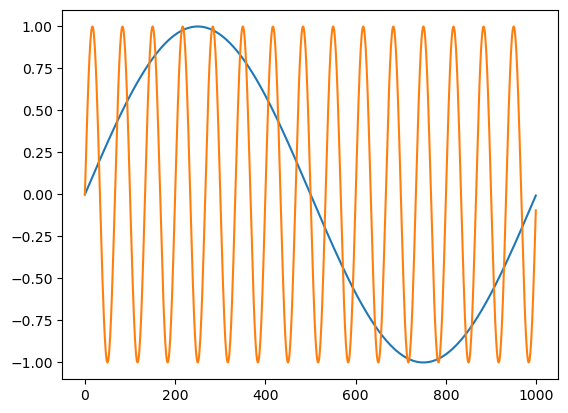

In [40]:
sine_mat = np.sin(omega * t) 
plt.plot(sine_mat.T)
sine_mat.shape

In [32]:
# Note the difference between 'broadcasting', and manually using the rules of matrix multiplication
# I use short vectors here, to enable us to see all elements
r = np.arange(3)       # vector
r2 = np.atleast_2d(r)  # 2d-matrix, shape 1x3
c = np.c_[[1, 2]]      # 2d_matrix, shape 2x1

# The next three operations yield the same result
print(c * r)           # broadcasting
print(r * c)           # also broadcasting
print(c @ r2)          # equivalent matrix multiplication

[[0 1 2]
 [0 2 4]]
[[0 1 2]
 [0 2 4]]
[[0 1 2]
 [0 2 4]]


In [33]:
# Just to be sure:
print((c * r) == (r * c))
print((c * r) == (c @ r2))

[[ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]]


## Putting it all together
The next step is to implement

\begin{equation}
    output = \sum_{i=[0, 1]} amp_i * \sin(omega_i * t)
\end{equation}

By multiplying a **(1x2)-amplitude vector** with a **(2xn)-data matrix** we obtain a **(1xn)**-shaped output
(From Python 3.5 on, "@" can be used for the scalar product):

(2,)


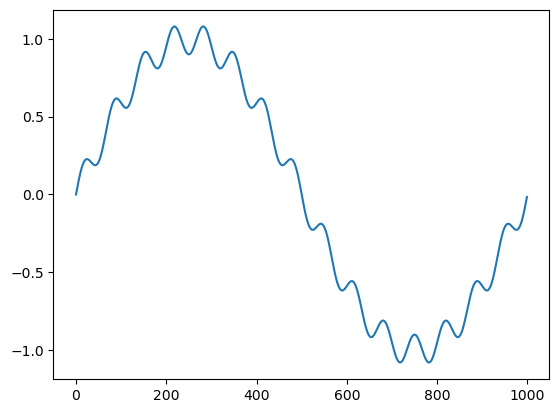

In [34]:
# Now multiply the data-matrix with the correpsponding amplitudes, and sum up the results
output = amps @ np.sin(omega * t)
plt.plot(output)
print(amps.shape)

## Doing it in Loops

For Exercise 1 you are supposed to evaluate the incoming sound in short time-windows. Here is how this can be done

In [35]:
# Pre-allocate memory, to make the loop faster
output = np.ones_like(t)

In [38]:
win_size = 100  # I deliberately choose an uneven "win_size", to demonstrate how to handle the reminder
for loop_nr in range(len(output)//win_size):  # "//" gives the floored integer of the division
    start = loop_nr * win_size
    stop = start + win_size
    output[start:stop] = amps @ sine_mat[:, start:stop]  # Since this is a demo, I leave "amps" constant
    print(sine_mat[:, start:stop])
# And to finish up the last few points
output[stop:] = amps @ sine_mat[:,stop:]

[[ 0.          0.00628314  0.01256604  0.01884844  0.0251301   0.03141076
   0.03769018  0.04396812  0.05024432  0.05651853  0.06279052  0.06906003
   0.07532681  0.08159061  0.0878512   0.09410831  0.10036171  0.10661115
   0.11285638  0.11909716  0.12533323  0.13156436  0.13779029  0.14401078
   0.15022559  0.15643447  0.16263717  0.16883344  0.17502306  0.18120576
   0.18738131  0.19354947  0.19970998  0.20586261  0.21200711  0.21814324
   0.22427076  0.23038943  0.236499    0.24259923  0.24868989  0.25477073
   0.26084151  0.26690199  0.27295194  0.27899111  0.28501926  0.29103617
   0.29704158  0.30303527  0.30901699  0.31498652  0.32094361  0.32688803
   0.33281954  0.33873792  0.34464292  0.35053432  0.35641188  0.36227537
   0.36812455  0.37395921  0.3797791   0.38558399  0.39137367  0.39714789
   0.40290644  0.40864907  0.41437558  0.42008573  0.42577929  0.43145605
   0.43711577  0.44275823  0.44838322  0.4539905   0.45957986  0.46515108
   0.47070393  0.4762382   0.48175367 

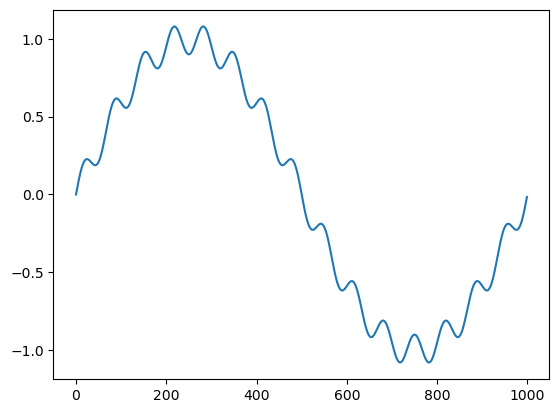

In [37]:
plt.plot(output)

[Soundproc_4_Stimulation.ipynb](Soundproc_4_Stimulation.ipynb)<img src="data/images/Backward.png" align="middle"> 

    Author: Thomas Haslwanter
    Date: Feb 20, 2023

<img src="data/images/CCA_40.png">

*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.